# Restaurant Rating Analysis

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Data = pd.read_csv("C:/Dataset .csv")

In [3]:
Data.head() #View the first rows

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
Data.info()   #Get information about the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
Data.describe()       #Summary statastics for numerical columns

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [6]:
Data.isnull().sum()  #Check for missing value

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Determine the Top three most common cuisines in the dataset

In [7]:
cuisine_count = Data['Cuisines'].value_counts()
top_3_cuisine = cuisine_count.head(3)
top_3_cuisine


Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

# Calculate the Percentage of Restaurants that serve each of the top cuisines

In [8]:

total_restaurants = len(Data)   

percent_top_cuisines = (top_3_cuisine/total_restaurants)*100
percent_top_cuisines

Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64

# Identify the City with Highest number of restaurants in the data set

In [9]:
city_count = Data['City'].value_counts()
city_with_highest_restaurants = city_count.idxmax()
city_with_highest_restaurants


'New Delhi'

# Calculate the aveerage rating for restaurants in each city

In [10]:
Avg_rating_by_city = Data.groupby('City')['Aggregate rating'].mean()
Avg_rating_by_city

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

# Determine the city with the highest average rating 

In [11]:
Avg_rating_by_city = Data.groupby('City')['Aggregate rating'].mean()
highest_avg_rating = Avg_rating_by_city.idxmax()
highest_avg_rating

'Inner City'

# Create a Histogram or bar chart to visualize the distribution of price ranges among the restuarants

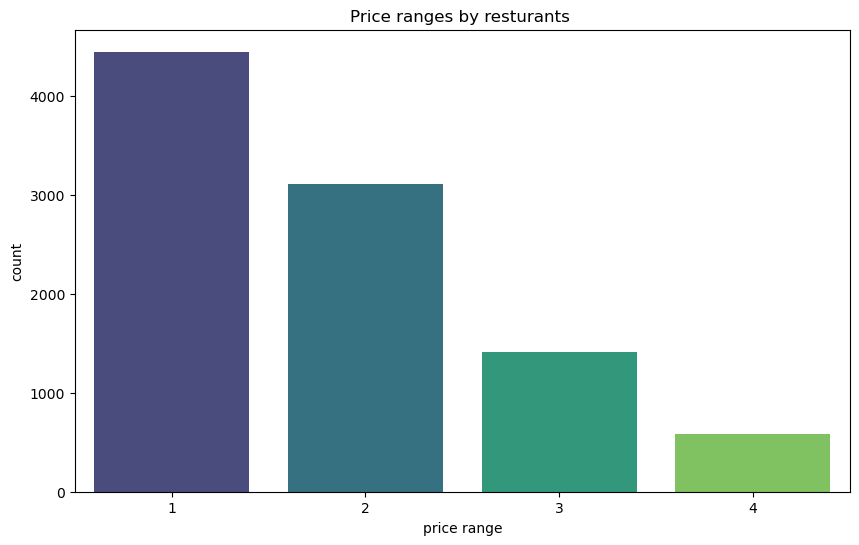

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Price range',data = Data,palette='viridis')
plt.title('Price ranges by resturants ')
plt.xlabel('price range')
plt.ylabel('count')
plt.show()

# Calculate the percentage of restaurants in each price range category

In [13]:
price_range_percentage = Data['Price range'].value_counts(normalize =True)*100
price_range_percentage

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64

# Determine the percentage of restuarants with and without online delivery

In [14]:
Percent_onlinedelivery = Data['Has Online delivery'].value_counts(normalize = True)*100
Percent_onlinedelivery

Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64

# Compare the Average ratings of restuarants with and without online delivery

In [15]:
Avg_rating = Data.groupby('Has Online delivery')['Aggregate rating'].mean()
Avg_rating

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64

# Analyze the distribution ratings and determine the most common rating range 

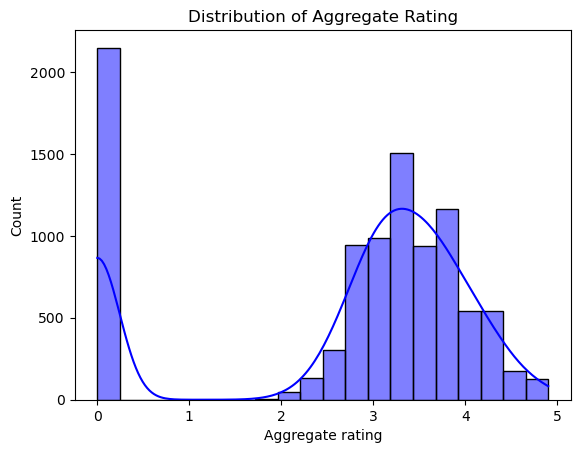

In [16]:
sns.histplot(Data['Aggregate rating'],bins = 20,kde = True, color = 'blue')
plt.title('Distribution of Aggregate Rating')
plt.show()

# Calculate the avgerage number of votes received by restruants

In [17]:
Avg_votes = Data['Votes'].mean()
Avg_votes

156.909747670401

In [18]:
Data['Combined cuisines'] = Data['Cuisines'].str.split(', ')
common_cuisines = Data['Combined cuisines'].explode().value_counts()
most_common_cuisines = common_cuisines.head(3)
most_common_cuisines

Combined cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

# Determine if certain cuisine combinations tend to have higher ratings.

In [19]:
Data['Combined cuisines'] = Data['Cuisines'].str.split(', ')
common_cuisines = Data.explode('Combined cuisines')
Avg_rating_cuisine = common_cuisines.groupby('Combined cuisines')['Aggregate rating'].mean()
Avg_rating_cuisine

Combined cuisines
Afghani          1.971429
African          3.525000
American         3.661538
Andhra           3.870000
Arabian          3.385714
                   ...   
Turkish Pizza    4.325000
Vegetarian       4.073913
Vietnamese       3.923810
Western          4.140000
World Cuisine    4.300000
Name: Aggregate rating, Length: 145, dtype: float64

In [24]:
import plotly.express as px

# Plot the location of restaurants on a map using longitude and latitude coordinates

In [25]:
fig = px.scatter_geo(Data,
                    lat = 'Latitude',
                    lon = 'Longitude',
                    color = 'Restaurant Name',
                    hover_name = 'Restaurant Name',
                    title = 'Restaurant locations')
fig.show()

# Identify if there any restaurant chains present in the dataset

In [26]:
#clean and normalize the restaurant names for better comparison
Data['Cleaned Name'] = Data['Restaurant Name'].str.lower().str.strip()


#find Restaurant chains by counting the occurances of each name
chain_counts = Data['Cleaned Name'].value_counts()


#Display the names that occur more than once(potential chains)
potential_chains = chain_counts[chain_counts > 1]
potential_chains

Cleaned Name
cafe coffee day        83
domino's pizza         79
subway                 63
green chick chop       51
mcdonald's             48
                       ..
jack po!tato's          2
metro fast food         2
the mirch masala        2
punjabi chicken         2
south indian corner     2
Name: count, Length: 742, dtype: int64

# Analyze the ratings and popularity of different restaurant chains

In [29]:
Data['Cleaned Name'] = Data['Restaurant Name'].str.lower().str.strip()

#calculating avg rating for restaurant chain
Avg_rating_chain = Data.groupby('Cleaned Name')['Aggregate rating'].mean()

#calculate total num of votes per each chain
total_chain = Data.groupby('Cleaned Name')['Votes'].sum()

#combined the results into a new dataframe
chain_analysis_df = pd.DataFrame({'Average Rating': Avg_rating_chain,
                                 'Total Votes': total_chain})
#Sort the Dataframe by average rating in desending order
chain_analysis_df = chain_analysis_df.sort_values(by= 'Average Rating', ascending =False)
chain_analysis_df

Average Rating  Total Votes
Cleaned Name                                    
braseiro da g��vea              4.9           40
masala library                  4.9          408
milse                           4.9          754
solita                          4.9          162
miann                           4.9          281
...                             ...          ...
m cr��me                        0.0            0
m&s coffee cafe                 0.0            3
sunrise bakery                  0.0            0
royal bakery                    0.0            2
khalsa eating point             0.0            0

[7433 rows x 2 columns]

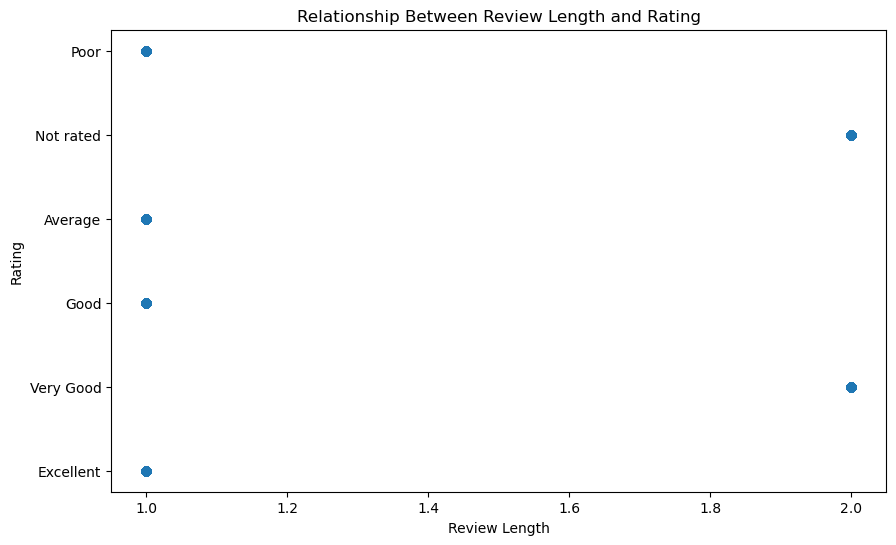

In [30]:
#Calculate the length of each review
Data['Review Length'] = Data['Rating text'].apply(lambda x: len(str(x).split()))

#Calculate the Average review length
average_review_length = Data['Review Length'].mean()
average_review_length

#Explore the relationship between review length and rating
plt.figure(figsize=(10, 6))
plt.scatter(Data['Review Length'], Data['Rating text'], alpha=0.5)
plt.title('Relationship Between Review Length and Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

# Identify the restaurants with the highest and lowest number of votes

In [31]:
highest_votes = Data.loc[Data['Votes'].idxmax()]
lowest_votes = Data.loc[Data['Votes'].idxmin()]

print("Restaurant with the Highest Votes :")
print(highest_votes[['Restaurant Name', 'Votes']])

print("\nRestaurant with the Lowest Votes:")
print(lowest_votes[['Restaurant Name', 'Votes']])

Restaurant with the Highest Votes :
Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object

Restaurant with the Lowest Votes:
Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object


# Analyze if there is correlation between the number of votes and the rating of a restaurant

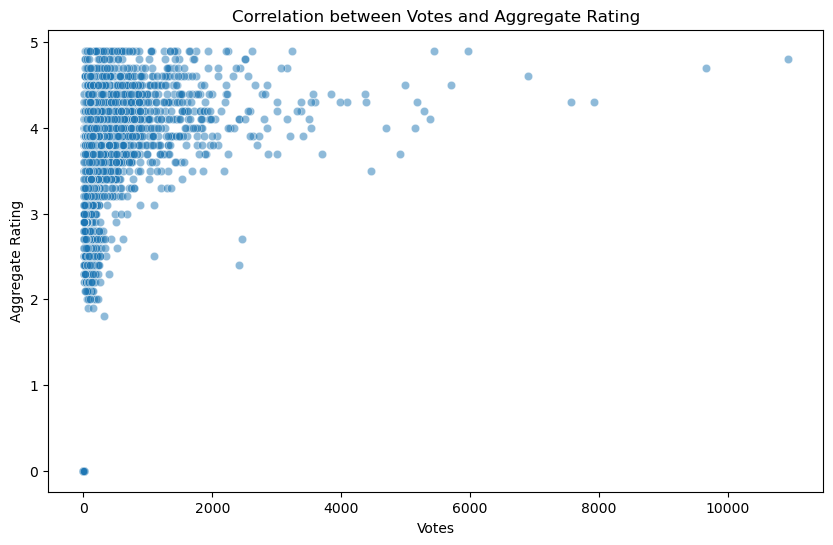

In [32]:
correlation = Data['Votes'].corr(Data['Aggregate rating'])
correlation

#create a scatter plot to visualize the relationship

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=Data, alpha=0.5)
plt.title('Correlation between Votes and Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

# Analyze if there is relationship between the price range and the avilablity of online delivery and table booking

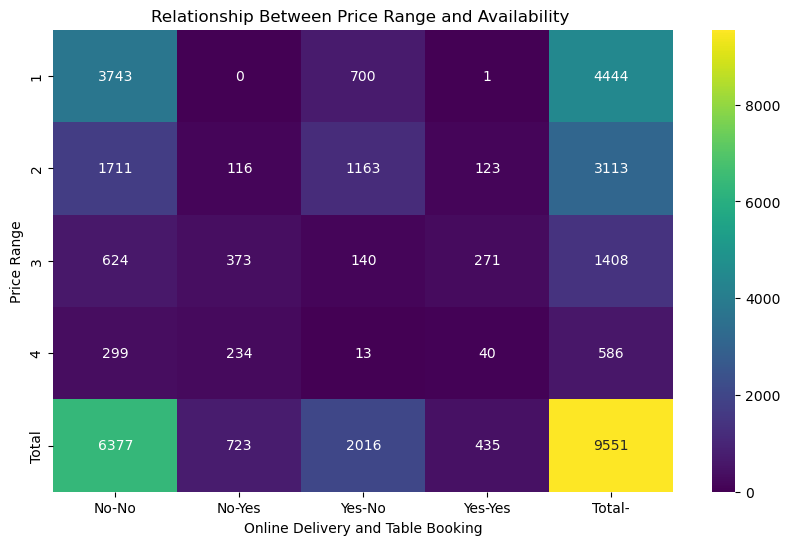

In [33]:
cross_tab = pd.crosstab(index=Data['Price range'], columns=[Data['Has Online delivery'],Data ['Has Table booking']], margins=True, margins_name= 'Total')
cross_tab
# Create a heatmap to visualize the relatioships
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar=True)
plt.title('Relationship Between Price Range and Availability ')
plt.xlabel('Online Delivery and Table Booking')
plt.ylabel('Price Range')
plt.show()

# Determine if higher priced restaurants are more likely to offer these services

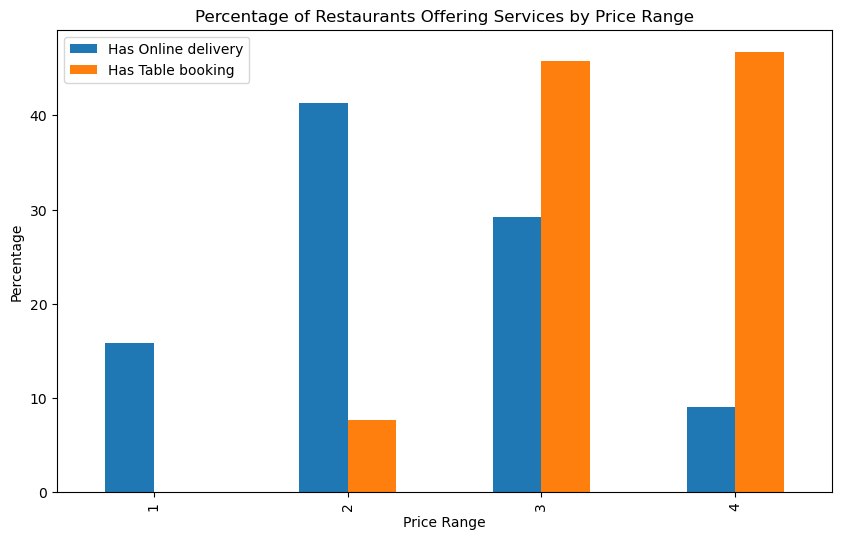

In [34]:
# Group the data by Price range and calculate the percentage of restaurants offering online delivery and table booking
service_percentage_by_price_range = Data.groupby('Price range')[['Has Online delivery', 'Has Table booking']].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
service_percentage_by_price_range

# Plot the results
service_percentage_by_price_range.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Restaurants Offering Services by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.show()